In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [8]:
data = pd.read_csv(location, sep="\s+")

In [15]:
pdb_list = ['1r69', '3icb', '256b', '4cpv', '2mhr', '1mba', '2fha', '1fc2', '1enh', '2gb1', '2cro', '1ctf', '4icb']
all_data = []
for pdb in pdb_list:
    for i in range(20):
        location = f"/Users/weilu/Research/server/may_2019/openMM_mass/fast/{pdb}/{i}/info.dat"
        tmp = pd.read_csv(location, sep="\s+")
        tmp = tmp.assign(Run=i, Protein=pdb)
        all_data.append(tmp)
data = pd.concat(all_data)

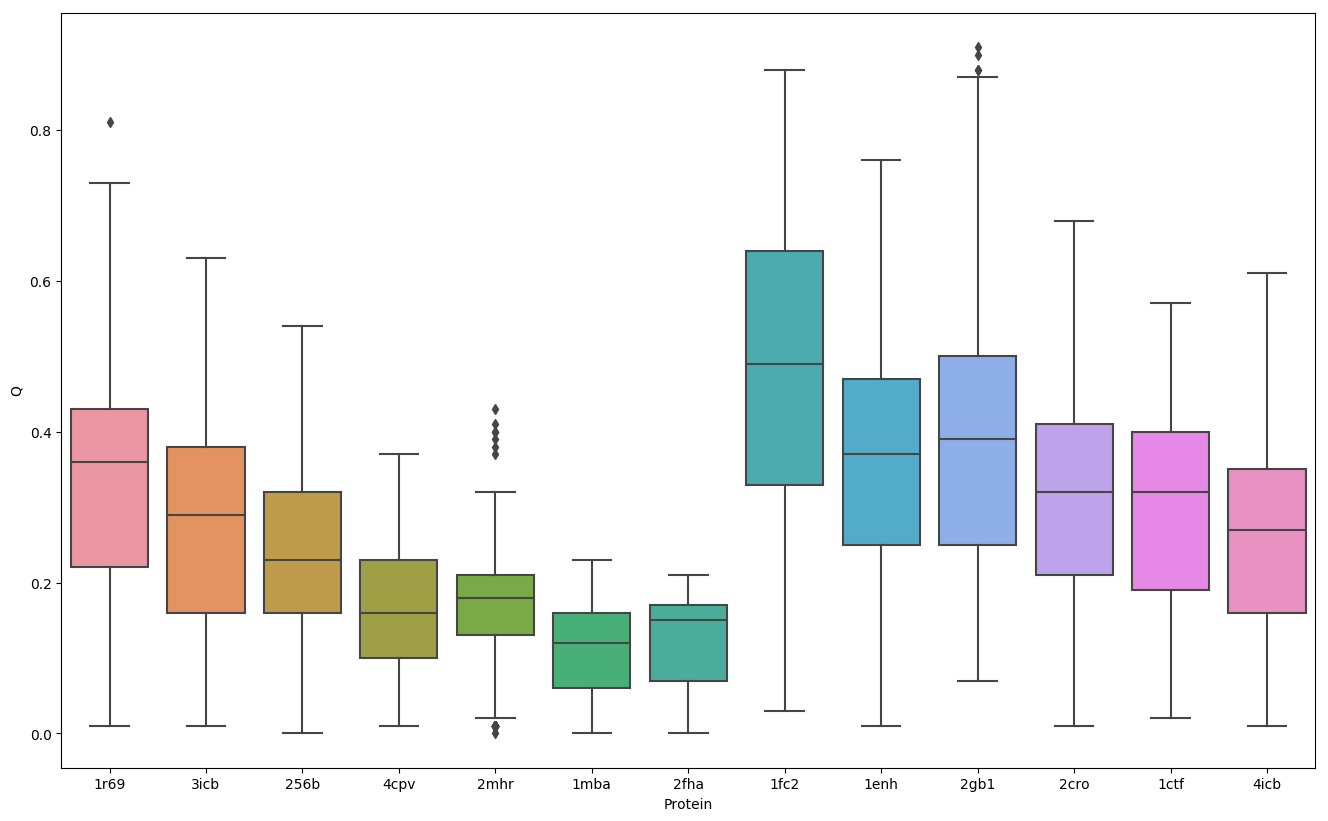

In [19]:
sns.boxplot("Protein", "Q", data=data)

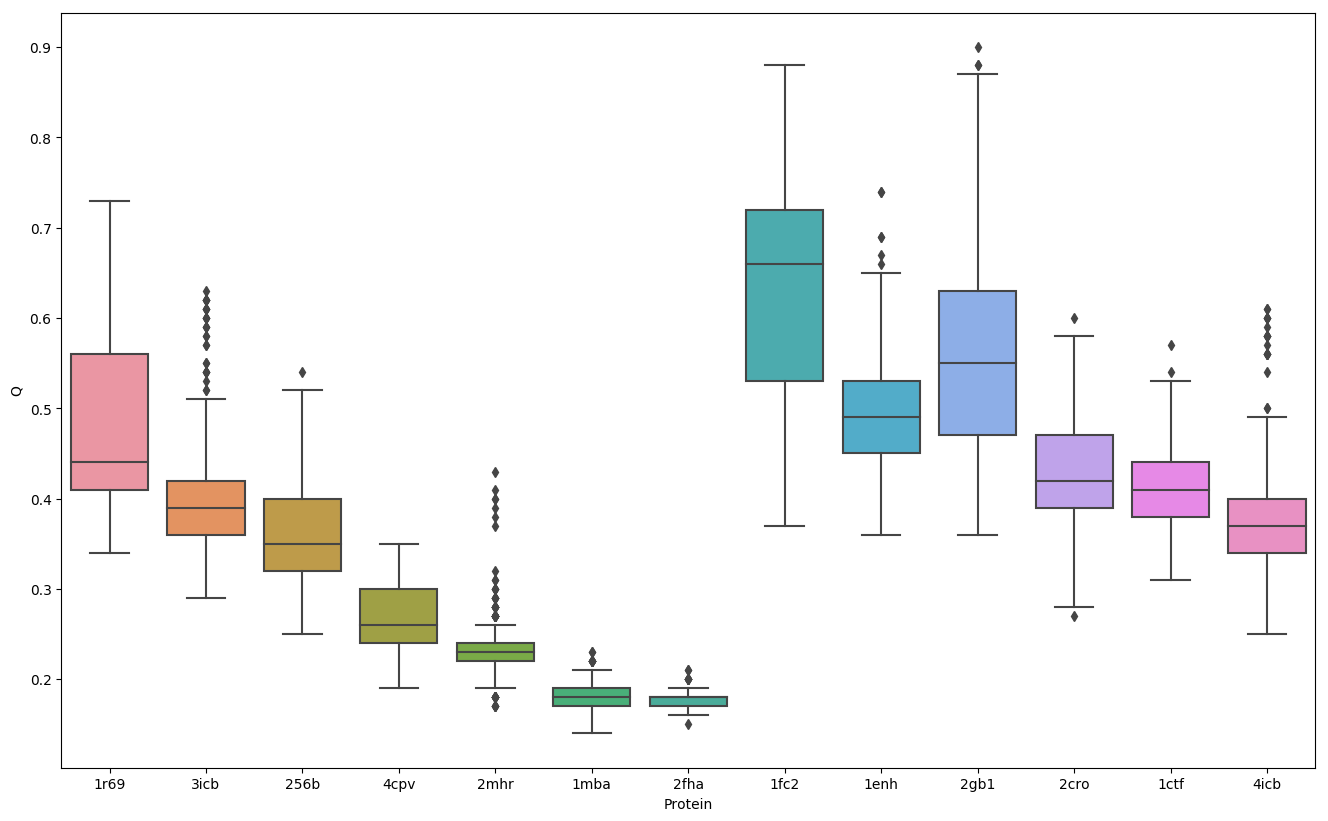

In [18]:
sns.boxplot("Protein", "Q", data=data.query("Steps > 80"))

In [16]:
data.columns

Index(['Steps', 'Q', 'Rg', 'Con', 'Chain', 'Chi', 'Excluded', 'Rama',
       'Contact', 'FamilyFold', 'Fragment', 'Membrane', 'Beta', 'Pap',
       'Rg_Bias', 'Total', 'Run', 'Protein'],
      dtype='object')

In [13]:
data

,Steps,Q,Rg,Con,Chain,Chi,Excluded,Rama,Contact,FamilyFold,Fragment,Membrane,Beta,Pap,Rg_Bias,Total
0,0,0.01,0.0,194.83,114.49,39.43,3.37,-80.57,-48.73,0.0,-52.04,0.0,-0.00,0.00,0.0,170.77
1,1,0.04,0.0,180.09,129.51,31.61,0.70,-96.87,-49.17,0.0,-116.81,0.0,-0.00,0.00,0.0,79.05
2,2,0.04,0.0,204.70,119.15,36.27,6.84,-60.66,-47.67,0.0,-133.00,0.0,-0.00,0.00,0.0,125.62
3,3,0.07,0.0,204.72,116.95,31.39,6.79,-94.05,-54.07,0.0,-173.85,0.0,-0.01,0.00,0.0,37.88
4,4,0.09,0.0,182.66,112.59,36.00,2.75,-78.70,-52.98,0.0,-219.14,0.0,-0.04,0.00,0.0,-16.87
5,5,0.10,0.0,198.69,114.13,42.22,2.19,-84.36,-48.42,0.0,-233.75,0.0,-0.00,0.00,0.0,-9.29
6,6,0.10,0.0,191.94,96.58,25.35,4.58,-79.51,-49.49,0.0,-239.83,0.0,-0.00,0.00,0.0,-50.38
7,7,0.13,0.0,207.07,128.82,31.46,10.68,-95.02,-53.58,0.0,-273.46,0.0,-0.00,0.00,0.0,-44.02
8,8,0.14,0.0,161.63,121.34,22.46,7.33,-87.56,-56.36,0.0,-273.26,0.0,-0.04,0.00,0.0,-104.46
9,9,0.13,0.0,135.93,104.89,30.36,0.68,-96.24,-53.37,0.0,-234.12,0.0,-0.17,-0.00,0.0,-112.04
